<a href="https://colab.research.google.com/github/sushil79g/60daysUdacity/blob/master/PROJECT%3A%20song_reco/songRECO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data visualization and pre-processing

In [0]:
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
data_folder = 'drive/My Drive/dataset/'

In [0]:
import pandas as pd
file = pd.read_csv(data_folder + 'lyrics.csv')
# file = pd.read_csv('lyrics.csv')

In [0]:
file.head(5)

,index,song,year,artist,genre,lyrics
0,0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu..."
1,1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see..."
2,2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote..."
4,4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po..."


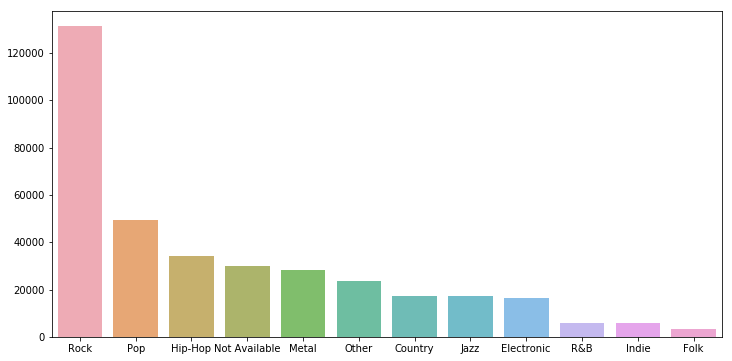

In [0]:
# sns.barplot(x='genre',data=file)
is_dup = file['genre'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(is_dup.index, is_dup.values, alpha=0.8)

In [0]:
def datapreprocess(x):
    small_case = x.lower()
    remove_punct = small_case.translate(str.maketrans('', '', string.punctuation))
    remove_newline = re.sub(r'\n',r' ',remove_punct)
#     remove_newline = remove_punct.replace('\n',' ')
    return remove_newline

In [0]:
# file['process_lyrics'] = file['lyrics'].apply(datapreprocess)
file.dropna(axis=0,inplace=True)

In [0]:
file['process_lyrics'] = file['lyrics'].map(datapreprocess)

In [0]:
file.head()

,index,song,year,artist,genre,lyrics,process_lyrics
0,0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu...",oh baby how you doing you know im gonna cut ri...
1,1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see...",playin everything so easy its like you seem so...
2,2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...,if you search for tenderness it isnt hard to f...
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote...",oh oh oh i oh oh oh i verse 1 if i wrote a boo...
4,4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po...",party the people the people the party its popp...


In [0]:
file.head()

,index,song,year,artist,genre,lyrics,process_lyrics,sentiment
0,0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu...",oh baby how you doing you know im gonna cut ri...,0.148268
1,1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see...",playin everything so easy its like you seem so...,0.068365
2,2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...,if you search for tenderness it isnt hard to f...,0.004720
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote...",oh oh oh i oh oh oh i verse 1 if i wrote a boo...,0.390422
4,4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po...",party the people the people the party its popp...,-0.170833


### Creating a word embedding

In [0]:
### OKAY! THIS PROCESS IS MEMORY INSTENSIVE :D 

# import wget
# import gzip
# from gensim.models.keyedvectors import KeyedVectors

# !wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.vec.gz
# # filename = wget.download(url)

# # f = gzip.open(wget.download(url), 'rb')
# # model = KeyedVectors.load_word2vec_format(f.read(), binary=False)

# # filename = 'pickle_model.pkl'

# # with open(filename, 'rb') as file:  
# #     model = pickle.load(file)

# print('model loaded')

In [0]:
!pip install contractions
!pip install textsearch
!pip install wget
!pip install gzip

In [0]:
#download word embedding from facebook ..btw thanks fb, finally something good from facebook.
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.vec.gz

--2019-07-19 10:49:29--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.vec.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.20.22.166, 104.20.6.166, 2606:4700:10::6814:6a6, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.20.22.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1325960915 (1.2G) [binary/octet-stream]
Saving to: ‘cc.en.300.vec.gz.2’

cc.en.300.vec.gz.2  100%[===================>]   1.23G  30.1MB/s    in 43s     

2019-07-19 10:50:13 (29.2 MB/s) - ‘cc.en.300.vec.gz.2’ saved [1325960915/1325960915]



In [0]:
#Extracting the vectorize file so that we can reconstruct it to keyedvectors
!gunzip -k cc.en.300.vec.gz

In [0]:
from gensim.models.keyedvectors import KeyedVectors
model = KeyedVectors.load_word2vec_format('cc.en.300.vec', binary=False)
model.save_word2vec_format('wiki.el.txt', binary=False)

### Feature extractions

In [0]:
from textblob import TextBlob

In [0]:
def sentiment(x):
    blob = TextBlob(x)
    return blob.sentiment.polarity

file['sentiment'] = file['process_lyrics'].map(sentiment)

In [0]:
import os


import re
import nltk
import pickle
import contractions
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem  import WordNetLemmatizer
  
#To classify lyrics to different class given in list_group, if the lyrics doesnt belong to following class it will be classified to 'other' class.
list_group = ['romance','inspirational','devotion','wedding','sad','dance','retro','love','relaxing']

os.environ["TF_CPP_MIN_LOG_LEVEL"]="3"

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('brown')




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [0]:
lemmatizer = WordNetLemmatizer()
stop_word = list(set(stopwords.words('english')))
stop_word = list(filter(lambda x : x!=str('not'),stop_word))


def noun_phrase(token):
  '''To extract important grammatical token from text'''

  key = pos_tag(token)
  data=[]
  for tag in key:
    if tag[1] == 'NN':
      data.append(tag[0])
  
  if len(data) == 0:
    return token
  
  return list(data)



def find_token(text):
    '''
    This function convert text, i.e string, into token
    after doing all required pre-processing

    argument: text -> input string to find token
    returns the token

    input: text of type string
    output: strings in list
    
    '''
    preprocess_text = text_processing(text)
    noun_phrase_token = noun_phrase(preprocess_text)
    
    return noun_phrase_token
           

In [0]:
def text_processing(text):
    
    #removing everything except letter and space
    temp = re.sub(r"[^A-Za-z ]+",r"",text)
    #lower case
    temp = temp.lower()
    #remove unnecessary spaces
    temp = " ".join(temp.split())
    #word tokenize
    temp = word_tokenize(temp)
    # remove stop words
    temp = [ item for item in temp if item not in stop_word]
    #lemmatize
    temp = [lemmatizer.lemmatize(item) for item in temp]
    
    return temp

In [0]:
def find_class(text):
    ''''
    This function return the classes on which the WFH reason
    belongs to 

    argument: text -> wfh reason 
    returns the classes on which wfh reason belongs

    input: text of type string
    output: text of type string
    '''

    assert isinstance(text,str), 'input should be string'
    tokens = find_token(text)

    if len(tokens) == 0:
        return 'empty'
    
    
    similar = []

    for compare in list_group:
        compare_with_all = []
        
        for token in tokens:
            try:
                similarity = model.similarity(compare,token)
                compare_with_all.append(similarity)
            except:
                compare_with_all.append(-1)
        
        similar.append(max(compare_with_all))

    if max(similar) > 0:
        max_index = similar.index(max(similar))
        return list_group[max_index]
    
    return 'other'

In [0]:
# print(find_class('travelling to hospital'))
# file.head()
file['class'] = file['process_lyrics'].apply(find_class)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
file.to_csv('after_classfying_data.csv')
!cp after_classfying_data.csv drive/My\ Drive/dataset/

In [0]:
file.head()

,index,song,year,artist,genre,lyrics,process_lyrics,sentiment,class,no_words
0,0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu...",oh baby how you doing you know im gonna cut ri...,0.148268,love,137
1,1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see...",playin everything so easy its like you seem so...,0.068365,sad,121
2,2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...,if you search for tenderness it isnt hard to f...,0.004720,devotion,99
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote...",oh oh oh i oh oh oh i verse 1 if i wrote a boo...,0.390422,love,128
4,4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po...",party the people the people the party its popp...,-0.170833,wedding,47


In [0]:
def number_of_words(text):
    return len(set(text.split()))

file['no_words'] = file['process_lyrics'].apply(number_of_words)

In [0]:
file.head()

,index,song,year,artist,genre,lyrics,process_lyrics,sentiment,class,no_words
0,0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu...",oh baby how you doing you know im gonna cut ri...,0.148268,love,137
1,1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see...",playin everything so easy its like you seem so...,0.068365,sad,121
2,2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...,if you search for tenderness it isnt hard to f...,0.004720,devotion,99
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote...",oh oh oh i oh oh oh i verse 1 if i wrote a boo...,0.390422,love,128
4,4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po...",party the people the people the party its popp...,-0.170833,wedding,47


### Modelling RecSys

In [4]:
file = pd.read_csv(data_folder +'after_classfying_data.csv')
file.drop('Unnamed: 0',axis=1,inplace=True)
print(file.head())

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


   index             song  year  ... sentiment     class no_words
0    0.0        ego-remix  2009  ...  0.148268      love    137.0
1    1.0     then-tell-me  2009  ...  0.068365       sad    121.0
2    2.0          honesty  2009  ...  0.004720  devotion     99.0
3    3.0  you-are-my-rock  2009  ...  0.390422      love    128.0
4    4.0    black-culture  2009  ... -0.170833   wedding     47.0

[5 rows x 10 columns]


In [5]:
### Comment out this if you have more ram and graphics.. i am currently taking of 0.5 lakh song
file = file[:50000]
len(file)

50000

In [0]:
new_file = file[['song','year','artist','genre','process_lyrics','sentiment','class','no_words']]
# new_file.to_csv('new_file.csv')
abc = pd.get_dummies(data = new_file,columns=['year','artist','genre','class'])
abc['sentiment'] = new_file['sentiment']
abc['no_words'] = new_file['no_words']

In [7]:
abc.head()

,song,process_lyrics,sentiment,no_words,year_702,year_1970,year_1971,year_1972,year_1973,year_1974,year_1975,year_1976,year_1977,year_1978,year_1979,year_1980,year_1981,year_1982,year_1983,year_1984,year_1985,year_1986,year_1987,year_1988,year_1989,year_1990,year_1991,year_1992,year_1993,year_1994,year_1995,year_1996,year_1997,year_1998,year_1999,year_2000,year_2001,year_2002,year_2003,year_2004,...,artist_the-foris,artist_the-four-horsemen,artist_the-frights,artist_the-gamits,artist_the-gaslight-anthem,artist_the-gathering,artist_the-gc5,artist_the-gents,artist_the-getaway-plan,artist_the-glitter-band,artist_the-gloria-record,artist_the-golden-sounds,artist_the-golliwogs,artist_the-good-china,artist_the-good-life,artist_the-grand-magnolias,artist_ykforward-russia,genre_Country,genre_Electronic,genre_Folk,genre_Hip-Hop,genre_Indie,genre_Jazz,genre_Metal,genre_Not Available,genre_Other,genre_Pop,genre_R&B,genre_Rock,class_dance,class_devotion,class_empty,class_inspirational,class_love,class_other,class_relaxing,class_retro,class_romance,class_sad,class_wedding
0,ego-remix,oh baby how you doing you know im gonna cut ri...,0.148268,137.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,then-tell-me,playin everything so easy its like you seem so...,0.068365,121.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,honesty,if you search for tenderness it isnt hard to f...,0.004720,99.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
3,you-are-my-rock,oh oh oh i oh oh oh i verse 1 if i wrote a boo...,0.390422,128.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,black-culture,party the people the people the party its popp...,-0.170833,47.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [8]:
abc.index

RangeIndex(start=0, stop=50000, step=1)

In [0]:
from sklearn.metrics.pairwise import cosine_similarity

In [0]:
# similarity_matrix = pd.DataFrame(cosine_similarity(matrix_df))
# abc.drop(['song','process_lyrics'],axis=1)
matrix_df = abc[abc.columns.difference(['song','process_lyrics'])]
cosine_sim = cosine_similarity(matrix_df, matrix_df.iloc[0:1])

In [38]:
import numpy as np
def find_nearest(location):
    diff = np.abs(cosine_sim*100000 - cosine_sim[location])
    idx = np.argsort(diff)[:3]
    return idx
# defg = find_nearest(5)
cosine_sim

array([[1.        ],
       [0.99993769],
       [0.99991007],
       ...,
       [0.999801  ],
       [0.99969267],
       [0.99979209]])

In [0]:
def find_index(song):
    row = list(abc[abc['song']==song].index)[0]
    return row

In [12]:
abc

,song,process_lyrics,sentiment,no_words,year_702,year_1970,year_1971,year_1972,year_1973,year_1974,year_1975,year_1976,year_1977,year_1978,year_1979,year_1980,year_1981,year_1982,year_1983,year_1984,year_1985,year_1986,year_1987,year_1988,year_1989,year_1990,year_1991,year_1992,year_1993,year_1994,year_1995,year_1996,year_1997,year_1998,year_1999,year_2000,year_2001,year_2002,year_2003,year_2004,...,artist_the-foris,artist_the-four-horsemen,artist_the-frights,artist_the-gamits,artist_the-gaslight-anthem,artist_the-gathering,artist_the-gc5,artist_the-gents,artist_the-getaway-plan,artist_the-glitter-band,artist_the-gloria-record,artist_the-golden-sounds,artist_the-golliwogs,artist_the-good-china,artist_the-good-life,artist_the-grand-magnolias,artist_ykforward-russia,genre_Country,genre_Electronic,genre_Folk,genre_Hip-Hop,genre_Indie,genre_Jazz,genre_Metal,genre_Not Available,genre_Other,genre_Pop,genre_R&B,genre_Rock,class_dance,class_devotion,class_empty,class_inspirational,class_love,class_other,class_relaxing,class_retro,class_romance,class_sad,class_wedding
0,ego-remix,oh baby how you doing you know im gonna cut ri...,0.148268,137.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,then-tell-me,playin everything so easy its like you seem so...,0.068365,121.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,honesty,if you search for tenderness it isnt hard to f...,0.004720,99.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
3,you-are-my-rock,oh oh oh i oh oh oh i verse 1 if i wrote a boo...,0.390422,128.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,black-culture,party the people the people the party its popp...,-0.170833,47.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
5,all-i-could-do-was-cry,i heard church bells ringing i heard a choir s...,0.336111,67.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
6,once-in-a-lifetime,this is just another day that i would spend wa...,0.176250,98.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
7,waiting,waiting waiting waiting waiting waiting waitin...,-0.132615,104.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
8,slow-love,verse 1 i read all of the magazines while wait...,0.117628,134.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
9,why-don-t-you-love-me,nnnow honey you better sit down and look aroun...,0.278853,111.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [13]:
matrix_df['sentiment']

0        0.148268
1        0.068365
2        0.004720
3        0.390422
4       -0.170833
5        0.336111
6        0.176250
7       -0.132615
8        0.117628
9        0.278853
10      -0.022917
11      -0.088071
12       0.029167
13      -0.096104
14       0.035065
15       0.129012
16       0.024959
17      -0.031138
18       0.259965
19       0.286364
20       0.286364
21       0.374218
22       0.286364
23       0.269786
24       0.000000
25      -0.032143
26       0.376255
27       0.322780
28       0.218730
29       0.159429
           ...   
49970   -0.175000
49971    0.464286
49972    0.159459
49973    0.218910
49974   -0.175000
49975    0.054583
49976    0.435000
49977    0.166188
49978    0.101429
49979    0.281001
49980    0.121825
49981    0.464286
49982    0.033222
49983    0.060982
49984    0.156138
49985    0.120000
49986    0.210705
49987    0.369159
49988    0.218910
49989   -0.100120
49990   -0.100120
49991    0.138079
49992    0.162500
49993    0.113170
49994    0